# Import Necessary Modules

In [ ]:
from tensorflow.keras.datasets import fashion_mnist, cifar10
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, GlobalAveragePooling2D, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet

# Display Loaded Data

In [ ]:
def display_img(img_set, title_set):
  n = len(title_set)
  plt.figure(figsize=(6, 6))
  for i in range(n):
    plt.subplot(5, 5, i + 1)
    if len(img_set[i].shape) == 2:  # Grayscale image
      plt.imshow(img_set[i], cmap='gray')
    else:  # RGB image
      plt.imshow(img_set[i])
    plt.title(title_set[i])
    plt.axis('off')
  plt.tight_layout()
  plt.show()
  plt.close()

# Load Dataset

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
trainX.shape: (60000, 28, 28), trainY.shape: (60000,), testX.shape: (10000, 28, 28), testY.shape: (10000,)
trainX.dtype: uint8, trainY.dtype: uint8, testX.dtype: uint8, testY.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0


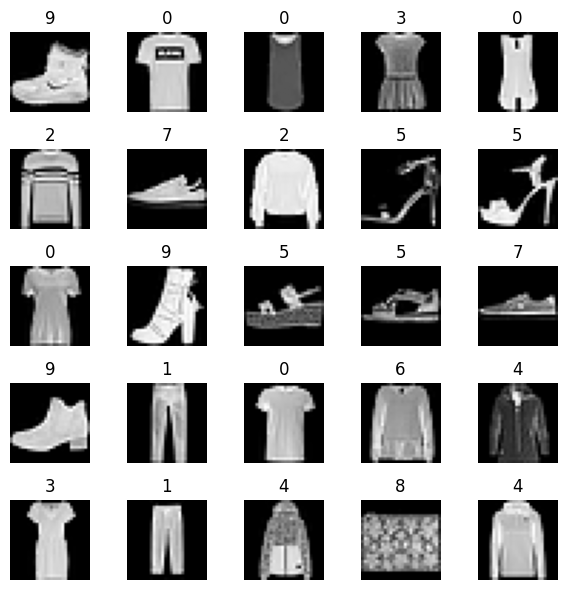

In [ ]:
# Load data
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

# Investigate loaded data
print('trainX.shape: {}, trainY.shape: {}, testX.shape: {}, testY.shape: {}'.format(trainX.shape, trainY.shape, testX.shape, testY.shape))
print('trainX.dtype: {}, trainY.dtype: {}, testX.dtype: {}, testY.dtype: {}'.format(trainX.dtype, trainY.dtype, testX.dtype, testY.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

# Display some loaded image data
display_img(trainX[:25], trainY[:25])

# Prepare Datasets

In [ ]:
# Turn 2D images into 3D so that trainX and trainY will be 4D since Convolutional layer takes 4D data as input
trainX = np.expand_dims(trainX, axis = -1)
testX = np.expand_dims(testX, axis = -1)

# Investigate update x
print('trainX.shape: {}, testX.shape: {}'.format(trainX.shape, testX.shape))
print('trainX.dtype: {}, text.dtype: {}'.format(trainX.dtype, testX.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

# Turn y into one-hot-encoding, so that we can use 10 neurons in the output layer
trainY = to_categorical(trainY, num_classes = 10)
testY = to_categorical(testY, num_classes = 10)

# Investigate updated y
print('trainY.shape: {}, testY.shape: {}'.format(trainY.shape, testY.shape))
print('trainY.dtype: {}, testY.dtype: {},'.format(trainY.dtype, testY.dtype))
print(trainY[:5])

trainX.shape: (60000, 28, 28, 1), testX.shape: (10000, 28, 28, 1)
trainX.dtype: uint8, text.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0
trainY.shape: (60000, 10), testY.shape: (10000, 10)
trainY.dtype: float64, testY.dtype: float64,
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Build a Fully Connected Neural Network (FCNN) for classifying 10 classes of images

In [ ]:
inputs = Input((28, 28, 1), name = 'InputLayer')
x = Flatten()(inputs)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation = 'relu')(x)
x = BatchNormalization()(x)
outputs = Dense(10, name = 'OutputLayer', activation = 'softmax')(x)
model = Model(inputs, outputs, name = 'Multi-Class-Classification')
model.summary()

Model: "Multi-Class-Classification"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         803,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,335,818 (5.10 MB)

 Trainable params: 1,334,794 (5.09 MB)

 Non-trainable params: 1,024 (4.00 KB)

# Train a Fully Connected Neural Network (FCNN) for classifying 10 classes of images

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(trainX, trainY, batch_size = 128, validation_split = 0.1, epochs = 10)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8879 - loss: 0.3052 - val_accuracy: 0.8782 - val_loss: 0.3391
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8851 - loss: 0.3065 - val_accuracy: 0.8780 - val_loss: 0.3272
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8904 - loss: 0.2887 - val_accuracy: 0.8803 - val_loss: 0.3247
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8989 - loss: 0.2707 - val_accuracy: 0.8883 - val_loss: 0.3069
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9006 - loss: 0.2681 - val_accuracy: 0.8860 - val_loss: 0.3190
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9034 - loss: 0.2591 - val_accuracy: 0.8897 - val_loss: 0.2994
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9027 - loss: 0.2539 - val_accuracy: 0.8897 - val_loss: 0.3014
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9079 - loss: 0.2489 - val_accuracy: 0.

# Test a Fully Connected Neural Network (FCNN) for classifying 10 classes of images

In [ ]:
# Evaluate model performance
model.evaluate(testX, testY)

# Predict Y values
predictY = model.predict(testX)

print('OriginalY    PredictedY')
print('=========    ==========')
for i in range(10):
  print(np.argmax(testY[i]), '\t\t', np.argmax(predictY[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8777 - loss: 0.3393
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
OriginalY    PredictedY
=========    ==========
9 		 9
2 		 2
1 		 1
1 		 1
6 		 6
1 		 1
4 		 4
6 		 6
5 		 5
7 		 7


# Build a Convolutional Neural Network (CNN) for classifying 10 classes of images

In [ ]:
inputs = Input((28, 28, 1), name='InputLayer')
x = Conv2D(32, (3, 3), padding = 'same', activation='relu')(inputs)
x = Conv2D(32, (3, 3), padding = 'same', activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding = 'same', activation='relu')(x)
x = Conv2D(64, (3, 3), padding = 'same', activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = Flatten()(x)

# Final dense layers
x = Dense(512, activation='relu')(x)
outputs = Dense(10, name='OutputLayer', activation='softmax')(x)

# Create the model
model = Model(inputs, outputs, name='ConvNet-Classification')

# Summary of the model
model.summary()

Model: "ConvNet-Classification"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 5, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,638,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,782,890 (6.80 MB)

 Trainable params: 1,782,890 (6.80 MB)

 Non-trainable params: 0 (0.00 B)

# Train a Convolutional Neural Network (CNN) for classifying 10 classes of images

In [ ]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(trainX, trainY, batch_size = 128, validation_split = 0.1, epochs = 10)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7407 - loss: 2.3784 - val_accuracy: 0.8872 - val_loss: 0.3156
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8981 - loss: 0.2747 - val_accuracy: 0.9032 - val_loss: 0.2613
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9186 - loss: 0.2192 - val_accuracy: 0.9110 - val_loss: 0.2489
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9334 - loss: 0.1806 - val_accuracy: 0.9143 - val_loss: 0.2485
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9440 - loss: 0.1501 - val_accuracy: 0.9140 - val_loss: 0.2545
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9536 - loss: 0.1225 - val_accuracy: 0.9123 - val_loss: 0.2989
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9627 - loss: 0.1021 - val_accuracy: 0.9145 - val_loss: 0.2990
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9665 - loss: 0.0885 - val_accuracy: 

# Test a Convolutional Neural Network (CNN) for classifying 10 classes of images

In [ ]:
# Evaluate model performance
model.evaluate(testX, testY)

# Predict Y values
predictY = model.predict(testX)

print('OriginalY    PredictedY')
print('=========    ==========')
for i in range(10):
  print(np.argmax(testY[i]), '\t\t', np.argmax(predictY[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9090 - loss: 0.4327
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
OriginalY    PredictedY
=========    ==========
9 		 9
2 		 2
1 		 1
1 		 1
6 		 6
1 		 1
4 		 4
6 		 6
5 		 5
7 		 7


# 3. Build a CNN having a pre-trained MobileNet as backbone to classify 10 classes.

In [ ]:
# Load MobileNet with pretrained weights
mobilenet_model = MobileNet(input_shape=(32, 32, 3), weights='imagenet', include_top=False)

# Freeze the layers of MobileNet (backbone)
for layer in mobilenet_model.layers:
    layer.trainable = False

# Build a new model based on pre-trained MobileNet
inputs = mobilenet_model.inputs
x = mobilenet_model.output
x = Flatten()(x)
x = Dense(512, activation = 'relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs, outputs, name='NewMobileNetModel')
model.summary(show_trainable=True)


<ipython-input-69-f7ccfaf38255>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_model = MobileNet(input_shape=(32, 32, 3), weights='imagenet', include_top=False)


Model: "NewMobileNetModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_8 (InputLayer)          │ (None, 32, 32, 3)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv1 (Conv2D)                      │ (None, 16, 16, 32)           │           864 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv1_bn (BatchNormalization)       │ (None, 16, 16, 32)           │           128 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv1_relu (ReLU)                   │ (None, 16, 16, 32)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_1 (DepthwiseConv2D)         │ (None, 16, 16, 32)           │           288 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_1_bn (BatchNormalization)   │ (None, 16, 16, 32)           │           128 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_1_relu (ReLU)               │ (None, 16, 16, 32)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_pw_1 (Conv2D)                  │ (None, 16, 16, 64)           │         2,048 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_pw_1_bn (BatchNormalization)   │ (None, 16, 16, 64)           │           256 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_pw_1_relu (ReLU)               │ (None, 16, 16, 64)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_pad_2 (ZeroPadding2D)          │ (None, 17, 17, 64)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_2 (DepthwiseConv2D)         │ (None, 8, 8, 64)             │           576 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_2_bn (BatchNormalization)   │ (None, 8, 8, 64)             │           256 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_2_relu (ReLU)               │ (None, 8, 8, 64)             │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_pw_2 (Conv2D)                  │ (None, 8, 8, 128)            │         8,192 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_pw_2_bn (BatchNormalization)   │ (None, 8, 8, 128)            │           512 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_pw_2_relu (ReLU)               │ (None, 8, 8, 128)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_3 (DepthwiseConv2D)         │ (None, 8, 8, 128)            │         1,152 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_3_bn (BatchNormalization)   │ (None, 8, 8, 128)            │           512 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_3_relu (ReLU)

 Total params: 3,758,794 (14.34 MB)

 Trainable params: 529,930 (2.02 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

# Load Dataset

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
trainX.shape: (50000, 32, 32, 3), trainY.shape: (50000, 1), testX.shape: (10000, 32, 32, 3), testY.shape: (10000, 1)
trainX.dtype: uint8, trainY.dtype: uint8, testX.dtype: uint8, testY.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0


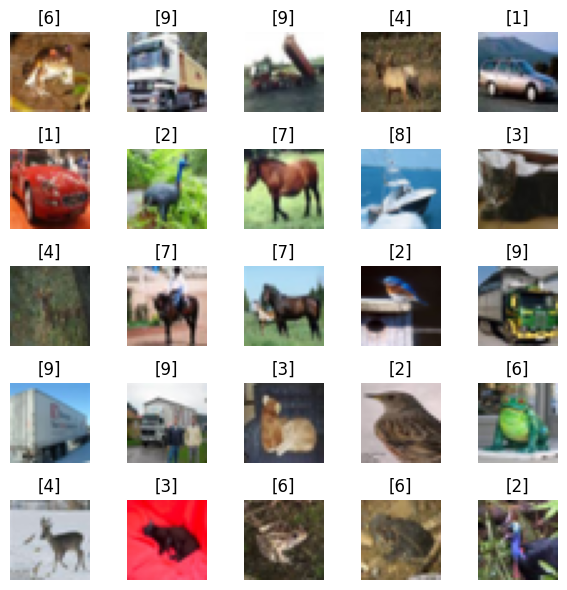

In [ ]:
# Load data
(trainX, trainY), (testX, testY) = cifar10.load_data()

# Investigate loaded data
print('trainX.shape: {}, trainY.shape: {}, testX.shape: {}, testY.shape: {}'.format(trainX.shape, trainY.shape, testX.shape, testY.shape))
print('trainX.dtype: {}, trainY.dtype: {}, testX.dtype: {}, testY.dtype: {}'.format(trainX.dtype, trainY.dtype, testX.dtype, testY.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

# Display some loaded image data
display_img(trainX[:25], trainY[:25])


# Prepare Datasets

In [ ]:
# Turn 2D images into 3D so that trainX and trainY will be 4D since Convolutional layer takes 4D data as input
trainX = np.expand_dims(trainX, axis = -1)
testX = np.expand_dims(testX, axis = -1)

# Investigate update x
print('trainX.shape: {}, testX.shape: {}'.format(trainX.shape, testX.shape))
print('trainX.dtype: {}, text.dtype: {}'.format(trainX.dtype, testX.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

# Turn y into one-hot-encoding, so that we can use 10 neurons in the output layer
trainY = to_categorical(trainY, num_classes = 10)
testY = to_categorical(testY, num_classes = 10)

# Investigate updated y
print('trainY.shape: {}, testY.shape: {}'.format(trainY.shape, testY.shape))
print('trainY.dtype: {}, testY.dtype: {},'.format(trainY.dtype, testY.dtype))
print(trainY[:5])

trainX.shape: (50000, 32, 32, 3, 1), testX.shape: (10000, 32, 32, 3, 1)
trainX.dtype: uint8, text.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0
trainY.shape: (50000, 10), testY.shape: (10000, 10)
trainY.dtype: float64, testY.dtype: float64,
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# 4. Train the CNN having a pre-trained MobileNet as backbone to classify images of the CIFAR-10 dataset (only transfer learning)

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(trainX, trainY, batch_size = 32, validation_split = 0.1, epochs = 10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.1757 - loss: 2.1955 - val_accuracy: 0.2042 - val_loss: 2.1409
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.2048 - loss: 2.1495 - val_accuracy: 0.2016 - val_loss: 2.1340
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2093 - loss: 2.1386 - val_accuracy: 0.2106 - val_loss: 2.1325
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2120 - loss: 2.1347 - val_accuracy: 0.2130 - val_loss: 2.1258
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2099 - loss: 2.1296 - val_accuracy: 0.2124 - val_loss: 2.1214
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2155 - loss: 2.1202 - val_accuracy: 0.2072 - val_loss: 2.1281
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2151 - loss: 2.1191 - val_accuracy: 0.2096 - val_loss: 2.1241
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2158 - loss: 2.1165 

# 4. Test the CNN having a pre-trained MobileNet as backbone to classify images of the CIFAR-10 dataset (only transfer learning)

In [ ]:
# Evaluate model performance
model.evaluate(testX, testY)

# Predict Y values
predictY = model.predict(testX)

print('OriginalY    PredictedY')
print('=========    ==========')
for i in range(10):
  print(np.argmax(testY[i]), '\t\t', np.argmax(predictY[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2085 - loss: 2.1527
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step
OriginalY    PredictedY
=========    ==========
3 		 8
8 		 9
8 		 1
0 		 1
6 		 6
6 		 6
1 		 6
6 		 6
3 		 6
1 		 4


# Unfreeze layers of the backbone

In [ ]:
for layer in mobilenet_model.layers[-86:]:
        layer.trainable = True

In [ ]:
model.summary(show_trainable=True)

Model: "NewMobileNetModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_3 (InputLayer)          │ (None, 32, 32, 3)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv1 (Conv2D)                      │ (None, 16, 16, 32)           │           864 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv1_bn (BatchNormalization)       │ (None, 16, 16, 32)           │           128 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv1_relu (ReLU)                   │ (None, 16, 16, 32)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_1 (DepthwiseConv2D)         │ (None, 16, 16, 32)           │           288 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_1_bn (BatchNormalization)   │ (None, 16, 16, 32)           │           128 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_1_relu (ReLU)               │ (None, 16, 16, 32)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_pw_1 (Conv2D)                  │ (None, 16, 16, 64)           │         2,048 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_pw_1_bn (BatchNormalization)   │ (None, 16, 16, 64)           │           256 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_pw_1_relu (ReLU)               │ (None, 16, 16, 64)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_pad_2 (ZeroPadding2D)          │ (None, 17, 17, 64)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_2 (DepthwiseConv2D)         │ (None, 8, 8, 64)             │           576 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_2_bn (BatchNormalization)   │ (None, 8, 8, 64)             │           256 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_2_relu (ReLU)               │ (None, 8, 8, 64)             │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_pw_2 (Conv2D)                  │ (None, 8, 8, 128)            │         8,192 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_pw_2_bn (BatchNormalization)   │ (None, 8, 8, 128)            │           512 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_pw_2_relu (ReLU)               │ (None, 8, 8, 128)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_3 (DepthwiseConv2D)         │ (None, 8, 8, 128)            │         1,152 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_3_bn (BatchNormalization)   │ (None, 8, 8, 128)            │           512 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv_dw_3_relu (ReLU)

 Total params: 14,324,192 (54.64 MB)

 Trainable params: 4,787,530 (18.26 MB)

 Non-trainable params: 22,912 (89.50 KB)

 Optimizer params: 9,513,750 (36.29 MB)

# 4.Train the CNN having a pre-trained MobileNet as backbone to classify images of the CIFAR-10 dataset (transfer_learning + fine tuning)

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(trainX, trainY, batch_size = 32, validation_split = 0.1, epochs = 10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 45s 16ms/step - accuracy: 0.4398 - loss: 3.2169 - val_accuracy: 0.6680 - val_loss: 0.9799
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.6756 - loss: 0.9654 - val_accuracy: 0.7104 - val_loss: 0.8181
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7268 - loss: 0.8026 - val_accuracy: 0.7284 - val_loss: 0.8241
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7489 - loss: 0.7517 - val_accuracy: 0.7264 - val_loss: 0.8222
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7553 - loss: 0.7319 - val_accuracy: 0.7680 - val_loss: 0.7020
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7875 - loss: 0.6559 - val_accuracy: 0.7198 - val_loss: 0.9049
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7999 - loss: 0.6211 - val_accuracy: 0.7762 - val_loss: 0.6885
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8229 - loss: 

# 4.Test the CNN having a pre-trained MobileNet as backbone to classify images of the CIFAR-10 dataset (transfer_learning + fine tuning)

In [ ]:
# Evaluate model performance
model.evaluate(testX, testY)

# Predict Y values
predictY = model.predict(testX)

print('OriginalY    PredictedY')
print('=========    ==========')
for i in range(10):
  print(np.argmax(testY[i]), '\t\t', np.argmax(predictY[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7937 - loss: 0.6704
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
OriginalY    PredictedY
=========    ==========
3 		 5
8 		 1
8 		 1
0 		 0
6 		 6
6 		 6
1 		 1
6 		 6
3 		 3
1 		 1


2: 0.3945\
4: 0.1901\
8: 0.4063\
16: 0.4770\
32: 0.5157\
64: 0.6230\
86: 0.7902